In [44]:
%pip install yfinance 
%pip install pandas-ta
! pip install pillow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [13]:
! pip install keras
! pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 KB 1.6 MB/s eta 0:00:002.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 2.0 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 2.4 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 2.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 KB 3.1 MB/s eta 0:00:00 MB/s eta 0:00:01
  Using cached wheel-0.44.0-py3-none-any.whl (67 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 KB 3.2 MB/s eta 0:00:00 MB/s eta 0:00

In [1]:
! pip install pandas-ta

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import yfinance as yf
from numpy import nan as npNaN
import pandas_ta as ta
from sklearn.preprocessing import MinMaxScaler


In [3]:
data = yf.download(tickers="MSFT" , start = '2012-03-11', end ='2024-04-11')
data.head(10)
data = data.dropna()


[*********************100%***********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12,31.969999,32.200001,31.820000,32.040001,25.495180,34073600
2012-03-13,32.240002,32.689999,32.150002,32.669998,25.996492,48951700
2012-03-14,32.529999,32.880001,32.490002,32.770000,26.076067,41986900
2012-03-15,32.790001,32.939999,32.580002,32.849998,26.139723,49068300
2012-03-16,32.910000,32.950001,32.500000,32.599998,25.940792,65626400
...,...,...,...,...,...,...
2024-04-04,424.989990,428.670013,417.570007,417.880005,416.377136,19370900
2024-04-05,420.010010,426.510010,418.320007,425.519989,423.989624,16544300
2024-04-08,425.170013,427.279999,423.299988,424.589996,423.062988,14272400


In [5]:
# add indicators: 

data['RSI'] = ta.rsi(data.Close, length=15)
data['EMAF'] = ta.ema(data.Close, length=20)
data['EMAM'] = ta.ema(data.Close, length = 100)
data['EMS'] = ta.ema(data.Close, length = 150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i] > 0 else 0 for i in range (len(data))]
data['TargetNextClose'] = data['Adj Close'].shift(-1)
data.dropna(inplace=True)
data.reset_index(inplace=True)
data.drop(['Volume' ,'Close', 'Date'], axis = 1, inplace=True)

/tmp/ipykernel_24842/2538033129.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i] > 0 else 0 for i in range (len(data))]


In [6]:
data

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMS,Target,TargetClass,TargetNextClose
0,29.219999,29.250000,28.870001,23.341152,32.221939,29.942393,30.423394,30.513067,-5.427290,0,23.542709
1,28.969999,29.320000,28.799999,23.542709,37.120315,29.871689,30.399169,30.495675,-5.577351,0,23.792650
2,29.370001,29.719999,29.250000,23.792650,42.628904,29.837242,30.381561,30.482620,-5.673477,0,23.776524
3,29.450001,29.740000,29.320000,23.776524,42.372305,29.804172,30.363907,30.469472,-5.442848,0,23.857151
4,29.299999,29.639999,29.090000,23.857151,44.172515,29.783774,30.348582,30.457824,-5.865416,0,23.784584
...,...,...,...,...,...,...,...,...,...,...,...
2885,419.730011,423.260010,419.089996,418.937897,54.271426,419.092304,393.481332,379.266606,-8.612854,0,416.377136
2886,424.989990,428.670013,417.570007,416.377136,51.435375,418.976847,393.964474,379.778041,3.979614,1,423.989624
2887,420.010010,426.510010,418.320007,423.989624,58.365177,419.600003,394.589336,380.383895,-2.107025,0,423.062988
2888,425.170013,427.279999,423.299988,423.062988,57.298834,420.075241,395.183409,380.969406,-1.693054,0,424.746948


In [7]:
data_set = data.iloc[:, 0:11]
pd.set_option('display.max_columns', None)

data_set.head(5)

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMS,Target,TargetClass,TargetNextClose
0,29.219999,29.250000,28.870001,23.341152,32.221939,29.942393,30.423394,30.513067,-5.427290,0,23.542709
1,28.969999,29.320000,28.799999,23.542709,37.120315,29.871689,30.399169,30.495675,-5.577351,0,23.792650
2,29.370001,29.719999,29.250000,23.792650,42.628904,29.837242,30.381561,30.482620,-5.673477,0,23.776524
3,29.450001,29.740000,29.320000,23.776524,42.372305,29.804172,30.363907,30.469472,-5.442848,0,23.857151
4,29.299999,29.639999,29.090000,23.857151,44.172515,29.783774,30.348582,30.457824,-5.865416,0,23.784584


In [8]:
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.00703929 0.0064821  0.00651035 ... 0.44976205 0.         0.00518467]
 [0.00641963 0.00665529 0.00633574 ... 0.44587277 0.         0.0057997 ]
 [0.00741108 0.00764492 0.00745822 ... 0.44338135 0.         0.00576002]
 ...
 [0.97565999 0.9893367  0.97794962 ... 0.53581688 0.         0.98828018]
 [0.98844969 0.99124172 0.99037162 ... 0.54654621 0.         0.99242389]
 [0.99159751 0.99237978 0.98618107 ... 0.5787065  0.         0.98501929]]


In [46]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 40
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2890
[[[7.03928675e-03 6.48210195e-03 6.51035318e-03 ... 7.67764380e-03
   6.69301131e-03 6.18935543e-03]
  [6.41963126e-03 6.65528707e-03 6.33574205e-03 ... 7.49807657e-03
   6.62715179e-03 6.14012131e-03]
  [7.41108383e-03 7.64491969e-03 7.45821837e-03 ... 7.41059256e-03
   6.57928476e-03 6.10316290e-03]
  ...
  [1.06580820e-03 8.65930316e-04 8.73036614e-04 ... 7.75472582e-04
   2.92632893e-03 3.23987989e-03]
  [1.09059499e-03 4.70077266e-04 2.74384159e-04 ... 5.90513036e-04
   2.78755339e-03 3.12697381e-03]
  [4.46152710e-04 8.41188910e-04 6.48541349e-04 ... 5.39269745e-04
   2.67736602e-03 3.03356109e-03]]

 [[6.41963126e-03 6.65528707e-03 6.33574205e-03 ... 7.49807657e-03
   6.62715179e-03 6.14012131e-03]
  [7.41108383e-03 7.64491969e-03 7.45821837e-03 ... 7.41059256e-03
   6.57928476e-03 6.10316290e-03]
  [7.60937340e-03 7.69440250e-03 7.63282474e-03 ... 7.32660272e-03
   6.53128890e-03 6.06594407e-03]
  ...
  [1.09059499e-03 4.70077266e-04 2.74384159e-04 ... 5.90513036e-04
   2.

In [47]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2280
(2280, 40, 8)
(570, 40, 8)
(2280, 1)
(570, 1)
[[0.00174022]
 [0.00148018]
 [0.00088011]
 ...
 [0.76905703]
 [0.76273642]
 [0.75552662]]


In [48]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(12)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=35, shuffle=True, validation_split = 0.1)

Epoch 1/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 9.2513e-04 - val_loss: 5.2107e-04
Epoch 2/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.0309e-05 - val_loss: 0.0013
Epoch 3/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.5922e-05 - val_loss: 2.1931e-04
Epoch 4/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.9480e-05 - val_loss: 2.1365e-04
Epoch 5/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.3873e-05 - val_loss: 2.9494e-04
Epoch 6/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.9583e-05 - val_loss: 1.6949e-04
Epoch 7/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.6179e-05 - val_loss: 1.8643e-04
Epoch 8/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.0633e-05 - val_loss: 2.3043e-04
Epoch 9/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.0294e-05 - val_loss: 4.6669e-04
Epoch 10/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.6836e-05 - val_loss: 1.6933e-04
Epoch 11/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.

In [49]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
[0.77586836] [0.75175335]
[0.76855385] [0.73795853]
[0.76324046] [0.70760489]
[0.7523165] [0.70159682]
[0.7278823] [0.70198145]
[0.71786] [0.702534]
[0.7170386] [0.70424044]
[0.7137464] [0.71214712]
[0.7172024] [0.67977487]
[0.7303559] [0.69275282]


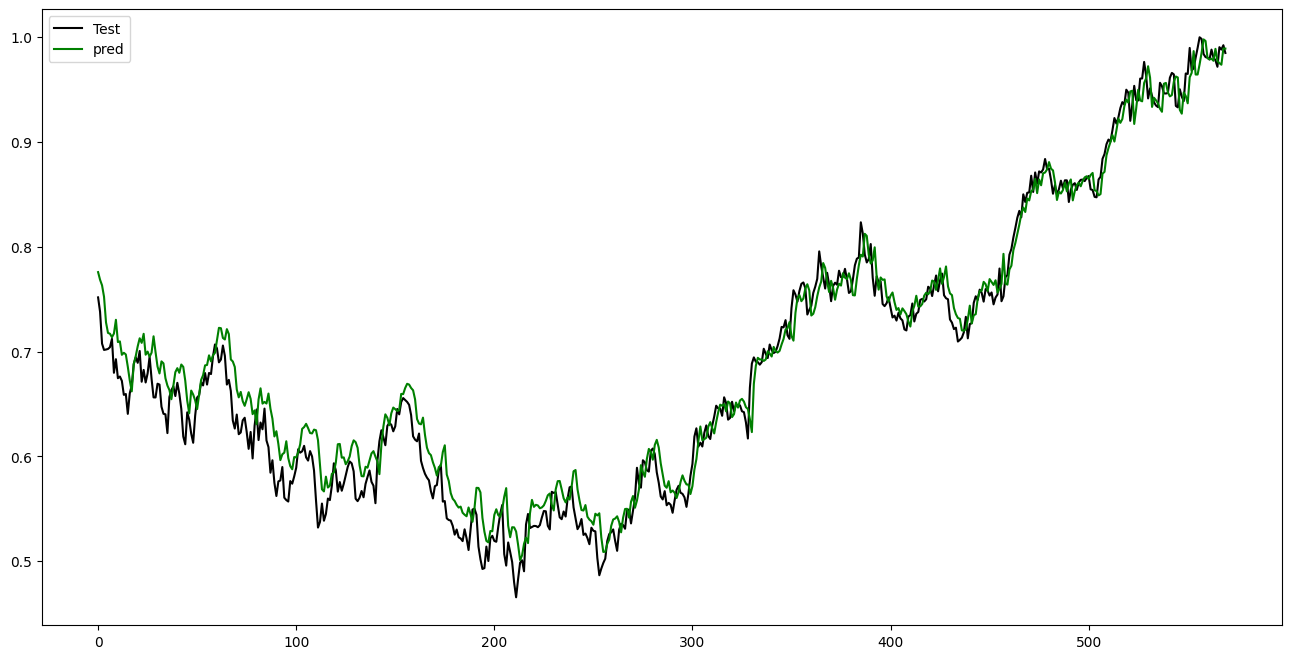

In [50]:
import base64
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

# plt.savefig('plt.jpg')
# with open("plt.jpg", "rb") as image_file:
#     encoded_string = base64.b64encode(image_file.read())

# print(encoded_string)

# base64.b64decode(encoded_string)


In [37]:
#also comprehensions for X
X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
print(X)
print(X.shape)

[[[0.00703929 0.0064821  0.00651035 0.0046887 ]
  [0.00641963 0.00665529 0.00633574 0.00518467]
  [0.00741108 0.00764492 0.00745822 0.0057997 ]
  ...
  [0.00780766 0.00791707 0.00695934 0.00494661]
  [0.00679143 0.00677899 0.00633574 0.00441093]
  [0.00619655 0.00633366 0.00636069 0.00445061]]

 [[0.00641963 0.00665529 0.00633574 0.00518467]
  [0.00741108 0.00764492 0.00745822 0.0057997 ]
  [0.00760937 0.0076944  0.00763282 0.00576002]
  ...
  [0.00679143 0.00677899 0.00633574 0.00441093]
  [0.00619655 0.00633366 0.00636069 0.00445061]
  [0.00634528 0.00588832 0.00486405 0.0032404 ]]

 [[0.00741108 0.00764492 0.00745822 0.0057997 ]
  [0.00760937 0.0076944  0.00763282 0.00576002]
  [0.00723758 0.00744699 0.00705912 0.00595842]
  ...
  [0.00619655 0.00633366 0.00636069 0.00445061]
  [0.00634528 0.00588832 0.00486405 0.0032404 ]
  [0.00158632 0.00165764 0.00122225 0.0014402 ]]

 ...

 [[0.94123189 0.94794525 0.93783983 0.95039932]
  [0.94579255 0.9495287  0.94305309 0.9432399 ]
  [0.93538